In [1]:
#import the required model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets,cluster


In [2]:
#load of data
digits=datasets.load_digits()
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [3]:
#determine the columns of data
print(digits.feature_names)

['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']


In [4]:
#determine the target of our data
print(digits.target)

[0 1 2 ... 8 9 8]


In [5]:
np.unique(digits.target)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [6]:
#determine the size of our data
digits.data.shape

(1797, 64)

In [7]:
x=digits.data
y=digits.target

In [8]:
df=pd.DataFrame(digits.data,columns=digits.feature_names)
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [9]:
#showing the pixel of number you enter

di=digits.images[2]


Text(0.5, 1.0, 'number:2')

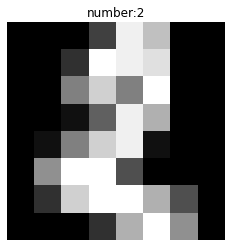

In [10]:
#representation of the emage of pixel
plt.imshow(di,cmap='gray')
plt.axis('off')
plt.title('number:'+str(y[2]))

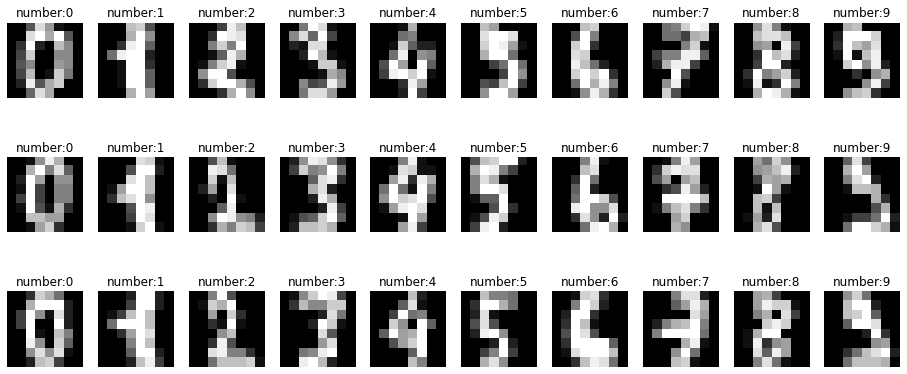

In [11]:
#generate images for the first 30 numbers
image,axes = plt.subplots(3,10,figsize=(16,7))
for a,image,number in zip(np.ravel(axes,order='C'),digits.images,y):
    a.imshow(image[:], cmap = 'gray')
    a.axis('off')
    a.set_title('number:'+str(number))

In [12]:
#split data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.20)

In [13]:
print("Training data:",x_train.shape)
print("Training labels:",y_train.shape)

Training data: (1437, 64)
Training labels: (1437,)


In [14]:
print("Testing data:",x_test.shape)
print("Testing labels:",y_test.shape)

Testing data: (360, 64)
Testing labels: (360,)


In [15]:
# dimensionality reduction on digits dataset
from sklearn import manifold
T = manifold.TSNE(n_components=2)
X_T = T.fit_transform(x_train)

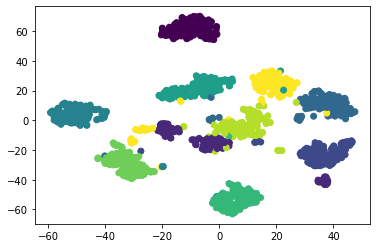

In [16]:
#showing traning data
plt.scatter(X_T[:,0], X_T[:,1],c=y_train)

In [17]:
#fit the model
model=KMeans(n_clusters=10)
model.fit(X_T)
model.labels_

array([4, 0, 7, ..., 0, 0, 0])

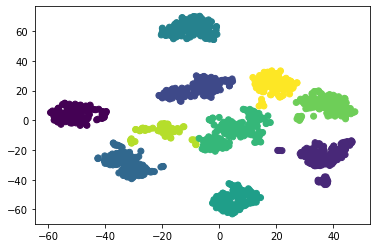

In [18]:
#visualization of the result obtained
plt.scatter(X_T[:,0], X_T[:,1], c=model.labels_)

In [19]:
#make predictions in the test dataset
x_T_pred = T.fit_transform(x_test)
y_pred = model.predict(x_T_pred)

print(y_pred)

[8 6 2 6 7 8 9 6 9 6 8 6 6 6 8 8 6 9 2 6 6 6 8 8 6 6 8 9 6 2 6 2 2 8 9 6 6
 8 6 6 2 6 2 2 6 8 9 2 6 9 8 6 9 7 8 2 8 6 8 9 6 6 2 2 6 2 6 2 8 6 2 6 9 6
 9 6 2 6 8 2 2 8 6 8 6 2 2 8 8 9 6 2 8 6 6 2 6 2 9 8 6 6 2 6 2 8 2 2 6 6 2
 8 6 8 9 2 8 6 7 7 9 6 8 2 6 8 6 8 6 9 8 6 6 6 9 2 6 7 6 2 8 6 8 2 2 2 8 9
 2 6 6 2 6 2 8 6 2 8 6 6 2 6 8 6 8 9 2 6 2 2 2 6 2 6 6 9 9 2 6 6 8 6 2 6 6
 6 8 2 6 9 9 2 6 6 8 7 9 2 9 2 6 6 6 6 9 6 2 6 8 6 6 8 7 6 8 2 2 7 9 9 6 6
 6 6 6 2 6 6 8 2 2 6 6 9 6 6 6 9 8 6 6 8 7 6 2 2 6 6 7 6 8 8 2 6 6 9 6 2 2
 8 6 2 6 6 6 8 8 6 2 6 2 8 6 2 6 9 8 6 6 2 6 7 2 8 2 2 8 6 7 9 7 6 8 6 8 6
 6 8 9 8 6 8 6 8 8 6 6 6 9 9 2 6 6 6 8 6 6 8 2 8 6 9 8 6 6 6 8 6 8 8 9 8 8
 7 9 6 6 8 6 2 2 2 2 9 8 6 2 2 7 2 2 6 6 6 9 2 6 6 8 6]


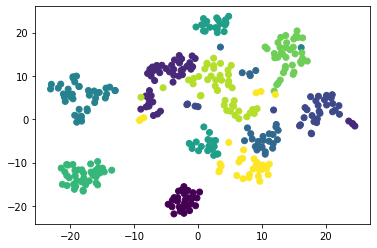

In [20]:
#visualization of the expected result
plt.scatter(x_T_pred[:,0], x_T_pred[:,1], c=y_test)

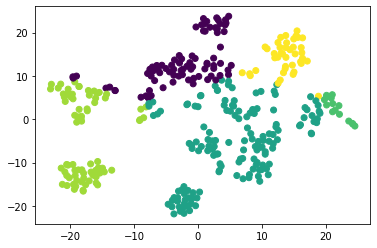

In [21]:
#visualization of the result obtained
plt.scatter(x_T_pred[:,0], x_T_pred[:,1], c=y_pred)

In [22]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test,y_pred)
cf

array([[ 0,  0,  0,  0,  0,  0, 27,  0,  0,  0],
       [ 0,  0, 34,  0,  0,  0,  6,  4,  2,  0],
       [ 0,  0,  0,  0,  0,  0, 21, 11,  0,  1],
       [ 0,  0,  1,  0,  0,  0, 22,  0,  0,  4],
       [ 0,  0,  7,  0,  0,  0,  0,  0, 33,  1],
       [ 0,  0, 19,  0,  0,  0, 18,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 37,  0],
       [ 0,  0,  0,  0,  0,  0,  2,  0,  0, 35],
       [ 0,  0, 20,  0,  0,  0, 24,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 28,  0,  3,  0]], dtype=int64)

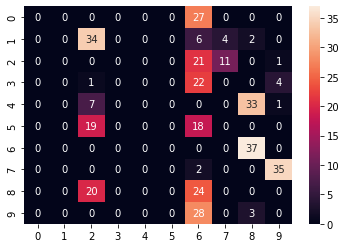

In [23]:
import seaborn as sns
s= sns.heatmap(cf,annot=True)

In [24]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      27.0
           1       0.00      0.00      0.00      46.0
           2       0.00      0.00      0.00      33.0
           3       0.00      0.00      0.00      27.0
           4       0.00      0.00      0.00      41.0
           5       0.00      0.00      0.00      37.0
           6       0.00      0.00      0.00      37.0
           7       0.00      0.00      0.00      37.0
           8       0.00      0.00      0.00      44.0
           9       0.00      0.00      0.00      31.0

    accuracy                           0.00     360.0
   macro avg       0.00      0.00      0.00     360.0
weighted avg       0.00      0.00      0.00     360.0



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
#classification accuracy measurement
from sklearn import metrics
ac=metrics.accuracy_score(y_test,y_pred)
print(ac)

0.0
